In [1]:
using QuantEcon
using Plots
pyplot()
using LaTeXStrings

# Exercise 1

The system is defined using:

- matrix $A$
- matrix $C$ and $G$
- vector of variables $x_{t}$
- variable of interest $y_{t}$
- shock $w_{t}$

The process is expressed as:
$$x_{t+1}=A x_{t}+ C w_{t+1}$$
$$y_{t}=G x_{t}$$
$$x_{0}\sim N(\mu_{0},\Sigma_{0})$$


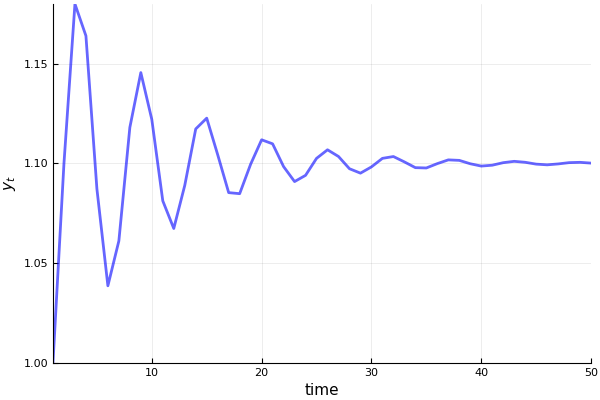

In [38]:
ϕ_0, ϕ_1, ϕ_2 = 1.1, 0.8, -0.8

A = [1.0   0.0   0
     ϕ_0   ϕ_1   ϕ_2
     0.0   1.0   0.0]
C = zeros(3, 1)
G = [0.0 1.0 0.0]
μ_0 = ones(3)

lss = LSS(A, C, G; mu_0=μ_0)

x, y = simulate(lss, 50)
plot(squeeze(y, 1), color=:blue, linewidth=2, alpha=0.6)
plot!(xlabel="time", ylabel=L"$y_t$", legend=:none)

In [73]:
function Sode(y0,phi0,phi1,phi2,T)
    A=[1 0 0;phi0 phi1 phi2;0 1 0]
    C=zeros(3,1)
    G=[0,1,0]'
    y=zeros(T,1)
    x_l=[1,y0[1],y0[2]]
    for t in 1:T
        x=A*x_l
        y[t]=G*x
        x_l=x
    end
    y=[y0[1] y']
    return y
end

Sode (generic function with 1 method)


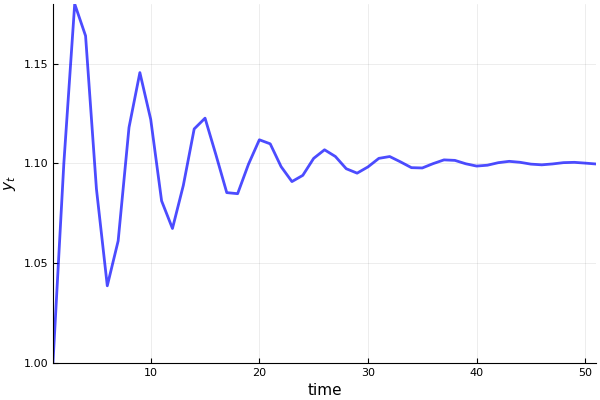

In [6]:
phi0=1.1
phi1=0.8
phi2=-0.8
y0=[1,1]
T=50
y=Sode(y0,phi0,phi1,phi2,T)
plot(squeeze(y, 1), color=:blue, linewidth=2, alpha=0.7)
plot!(xlabel="time", ylabel=L"$y_t$", legend=:none)

# Exercise 2


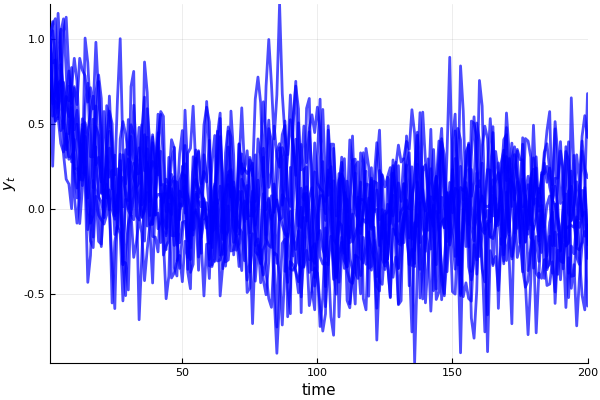

In [68]:
ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.2

A = [ϕ_1   ϕ_2   ϕ_3   ϕ_4
     1.0   0.0   0.0   0.0
     0.0   1.0   0.0   0.0
     0.0   0.0   1.0   0.0]
C = [σ
     0.0
     0.0
     0.0]
G = [1.0 0.0 0.0 0.0]

ar = LSS(A, C, G; mu_0=ones(4))
ys=[]
for i=1:10
    x, y = simulate(ar, 200)
    y=squeeze(y,1)
    push!(ys,y)
end
plot(ys, color=:blue, linewidth=2,alpha=0.7)
plot!(xlabel="time", ylabel=L"$y_t$", legend=:none)

# Exercise 3

[80.0, 63.2383, 56.5308, 55.9926, 56.8351, 49.5876, 42.4153, 38.4153, 39.1595, 35.1494, 30.6806, 28.1801, 28.0092, 26.6365, 21.5482, 20.3749, 20.3537, 21.4208, 17.7377, 14.6961, 14.3865, 15.0445, 14.84, 11.5757, 8.82526, 11.0856, 11.0983, 7.40683, 4.943, 6.56029, 9.18709, 6.83098, 3.98491, 3.20455, 5.42973, 3.46964, 3.47746, 1.9789, 3.55664, 3.56186, 2.94152, 1.49231, 1.86389, 1.47558, 0.809085, 0.353327, 1.26775, 0.482275, 1.32527, -0.119758]


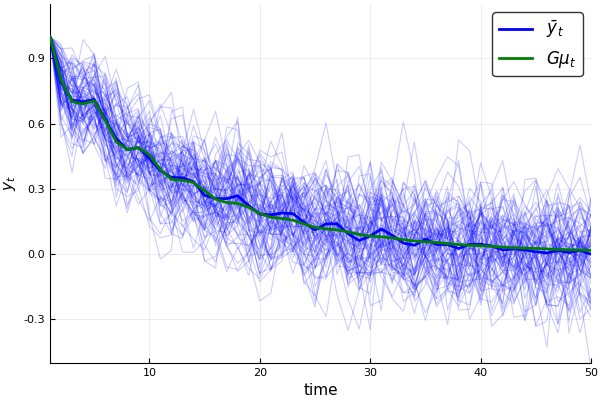

In [70]:
ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.1

A = [ϕ_1   ϕ_2   ϕ_3   ϕ_4
     1.0   0.0   0.0   0.0
     0.0   1.0   0.0   0.0
     0.0   0.0   1.0   0.0]
C = [σ
     0.0
     0.0
     0.0]''
G = [1.0 0.0 0.0 0.0]
I = 80
T = 50
ar = LSS(A, C, G; mu_0=ones(4))
ymin, ymax = -0.5, 1.15

ensemble_mean = zeros(T)
ys = []
for i=1:I
    x, y = simulate(ar, T)
    y = squeeze(y, 1)
    push!(ys, y)
    #ensemble_mean .+= y
    ensemble_mean=y+ensemble_mean
end
print(ensemble_mean)
ensemble_mean = ensemble_mean ./ I
plot(ys, color=:blue, alpha=0.2, linewidth=0.8, label="")
plot!(ensemble_mean, color=:blue, linewidth=2, label=L"$\bar y_t$")
m = moment_sequence(ar)
state = start(m)
pop_means = Float64[]
for t=1:T
    (μ_x, μ_y, Σ_x, Σ_y), state = next(m,state)
    push!(pop_means, μ_y[1])
end
plot!(pop_means, color=:green, linewidth=2, label=L"$G\mu_t$")
plot!(ylims=(ymin, ymax), xlabel="time", ylabel=L"$y_t$", legendfont=font(12))

# Exercise 4


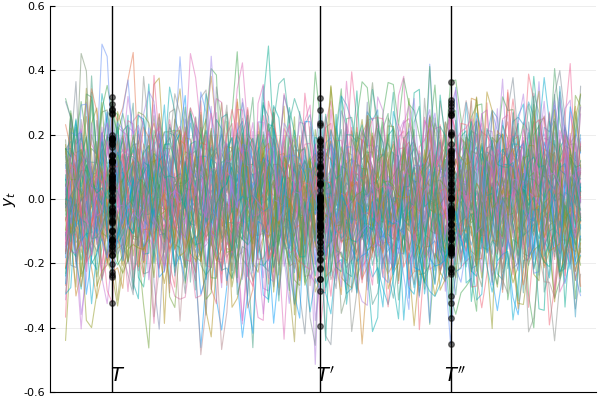

In [32]:
ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.1

A = [ϕ_1   ϕ_2   ϕ_3   ϕ_4
     1.0   0.0   0.0   0.0
     0.0   1.0   0.0   0.0
     0.0   0.0   1.0   0.0]
C = [σ
     0.0
     0.0
     0.0]
G = [1.0 0.0 0.0 0.0]

T0 = 10
T1 = 50
T2 = 75
T4 = 100

ar = LSS(A, C, G; mu_0=ones(4))
ymin, ymax = -0.6, 0.6

μ_x, μ_y, Σ_x, Σ_y = stationary_distributions(ar)
ar = LSS(A, C, G; mu_0=μ_x, Sigma_0=Σ_x)
colors = ["c", "g", "b"]

ys = []
x_scatter = []
y_scatter = []
for i=1:80
    rcolor = colors[rand(1:3)]
    x, y = simulate(ar, T4)
    y = squeeze(y, 1)
    push!(ys, y)
    x_scatter = [x_scatter; T0; T1; T2]
    y_scatter = [y_scatter; y[T0]; y[T1]; y[T2]]
end

plot(ys, linewidth=0.8, alpha=0.5)
plot!([T0 T1 T2; T0 T1 T2], [-1 -1 -1; 1 1 1], color=:black, legend=:none)
scatter!(x_scatter, y_scatter, color=:black, alpha=0.5)
plot!(ylims=(ymin, ymax), ylabel=L"$y_t$", xticks=[], yticks=ymin:0.2:ymax)
plot!(annotations=[(T0+1, -0.55, L"$T$");(T1+1, -0.55, L"$T'$");(T2+1, -0.55, L"$T''$")])

In [71]:
α=0.5

0.5

In [72]:
b=α^2

0.25